## Import Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as sk

/opt/anaconda3/lib/python3.8/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


## Read Image

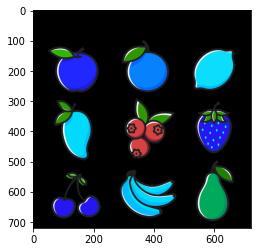

In [2]:
fp = "ObjectCount2.png"

img = cv2.imread(fp)
plt.imshow(img)
plt.show()

## Preprocessing the image


In [3]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

h, s, v = cv2.split(hsv)

_, thr = cv2.threshold(s, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

blur = cv2.medianBlur(thr, 5)

contours, hierarchy = cv2.findContours(blur,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
count = []
for x in contours:
  area = cv2.contourArea(x)
  if area > 1000 :
    count.append(x)


## Separating Objects, creating a line between different objects

In [4]:
from __future__ import print_function
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage

D = ndimage.distance_transform_edt(thr)
localMax = peak_local_max(D, indices=False, min_distance=40, labels=thr)
markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-D, markers, mask=thr)
ws = len(np.unique(labels)) -1

<ipython-input-4-e20641cc436a>:7: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  localMax = peak_local_max(D, indices=False, min_distance=40, labels=thr)
/opt/anaconda3/lib/python3.8/site-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


## Counting Objects in Image

Number of objects =  16


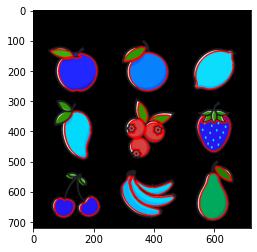

In [5]:
ans = int((ws + len(count)) / 2)
print("Number of objects = ", ans)
cv2.drawContours(img, count, -1, (255,0,0), 3)
plt.imshow(img)
plt.show()

## Connected Component Labelling

In [6]:
def connected_component_label(path):
    
    # Getting the input image
    img = cv2.imread(path, 0)
    # Converting those pixels with values 1-127 to 0 and others to 1
    img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1]
    # Applying cv2.connectedComponents() 
    num_labels, labels = cv2.connectedComponents(img)
    
    # Map component labels to hue val, 0-179 is the hue range in OpenCV
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # Converting cvt to BGR
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0
    
    
    # Showing Original Image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Orginal Image")
    plt.show()
    
    #Showing Image after Component Labeling
    plt.imshow(cv2.cvtColor(labeled_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Labeling")
    plt.show()
    
    print("No of Labels : ",num_labels)
                        

## Calling CCL Function

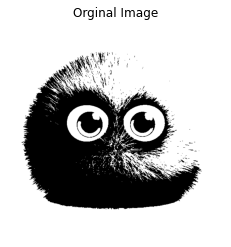

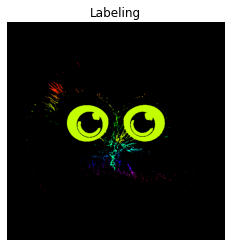

No of Labels :  436


In [7]:
connected_component_label('Labelling1.jpeg')

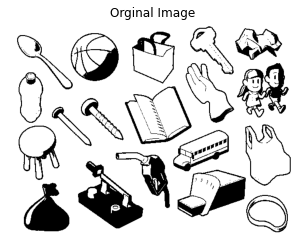

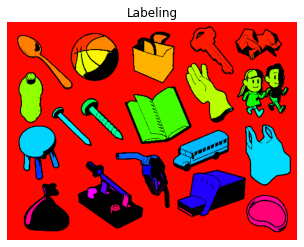

No of Labels :  117


In [8]:
connected_component_label('labelling2.png')

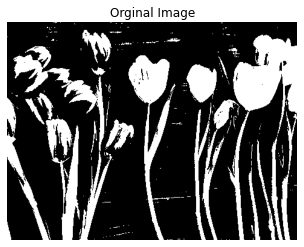

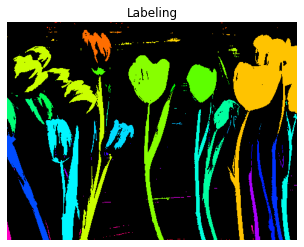

No of Labels :  249


In [9]:
connected_component_label('flowerPath.jpeg')